In [65]:
from matplotlib import pyplot as plt

import pandas as pd
import diversity_metrics
import numpy as np

## Import and clean data

In [74]:
# import data
pc_species = pd.read_csv('point-count-species.csv')

# manual cleaning
pc_species[['Date']] = pc_species[['Date']].replace(to_replace = {'11/1/2023':'11/01/2023',
                                                                  '11/11/23': '11/11/2023',
                                                                  '12/2/2023': '12/02/2023'})
pc_species['Date'] = pd.to_datetime(pc_species['Date'])
pc_species['Species'] = pc_species['Species'].str.lower()

valid_pc_data = pd.read_csv('pc-data-with-completeness.csv')
valid_pcs = list(valid_pc_data['PC #'].unique())
pc_species = pc_species[pc_species['PC #'].isin(valid_pcs)]

pc_species

,PC #,Date,Location,Time Bin,Species,# Individuals,Notes,Editorial notes,Jon Problem Checker
0,1.0,2023-10-06,A1,Morning (7-9am),rock pigeon,3.0,NaN,NaN,-
1,1.0,2023-10-06,A1,Morning (7-9am),anna's hummingbird,3.0,NaN,NaN,-
2,1.0,2023-10-06,A1,Morning (7-9am),nuttall's woodpecker,1.0,NaN,NaN,-
3,1.0,2023-10-06,A1,Morning (7-9am),american crow,3.0,NaN,NaN,-
4,1.0,2023-10-06,A1,Morning (7-9am),dark-eyed junco,2.0,NaN,NaN,-
...,...,...,...,...,...,...,...,...,...
4888,686.0,2024-04-05,A5,Evening (3-5pm),lesser goldfinch,6.0,NaN,NaN,NaN
4889,686.0,2024-04-05,A5,Evening (3-5pm),dark-eyed junco,3.0,NaN,NaN,NaN
4890,686.0,2024-04-05,A5,Evening (3-5pm),yellow-rumped warbler,1.0,NaN,NaN,NaN
4891,687.0,2024-04-05,A6,Evening (3-5pm),american crow,8.0,NaN,NaN,NaN


In [75]:
pc_dates = pc_species['Date'].unique()
species_seen = sorted(pc_species['Species'].unique())

### Calculate abundance and frequency for all species seen

We are measuring abundance in number of survey days seen and frequency in abundance divided by total number of survey days (51). Multiple point counts were done on each day, but we are aggregating all point counts done on the same day.

In [76]:
species_abundances = [diversity_metrics.abundance_days_seen(pc_species, species) for species in species_seen]
species_frequencies = [diversity_metrics.frequency_days_seen(pc_species, species) for species in species_seen]

In [77]:
abundance_and_frequency = pd.DataFrame()
abundance_and_frequency['Species'] = species_seen
abundance_and_frequency['Abundance'] = species_abundances
abundance_and_frequency['Frequency'] = species_frequencies
abundance_and_frequency

,Species,Abundance,Frequency
0,"""bird of prey"" sp.",1,0.02
1,accipiter sp,1,0.02
2,accipiter sp.,1,0.02
3,allen's hummingbird,1,0.02
4,american crow,50,1.00
...,...,...,...
94,wilson's warbler,1,0.02
95,woodpecker sp,1,0.02
96,woodpecker sp.,12,0.24
97,yellow-rumped warbler,41,0.82


In [78]:
# Frequency -> mean and variance
mean_frequency = np.mean(abundance_and_frequency['Frequency'])
frequency_variance = np.var(abundance_and_frequency['Frequency'])
mean_frequency, frequency_variance

(0.26505050505050504, 0.10718661361085602)

Meilin note: smaller mean frequency, but a little more variance. Not sure if this is due to random chance since we did a lot less surveying in sp 23

In [79]:
abundance_and_frequency.sort_values("Frequency")

,Species,Abundance,Frequency
0,"""bird of prey"" sp.",1,0.02
63,pigeon/dove sp.,1,0.02
21,cassin's vireo**,1,0.02
59,passerid sp.,1,0.02
24,cliff swallow,1,0.02
...,...,...,...
6,american robin,47,0.94
27,dark-eyed junco,48,0.96
8,anna's hummingbird,49,0.98
4,american crow,50,1.00


Across all species, only three were seen every day: Anna's Hummingbird, American Crow, and Chestnut-Backed Chickadee. Unlike Spring 2023's data, the Dark-Eyed Junco was not seen in every day.

In [80]:
abundance_and_frequency.to_csv('species-abundance-and-frequency.csv')

In [81]:
species_seen

['"bird of prey" sp.',
 'accipiter sp',
 'accipiter sp.',
 "allen's hummingbird",
 'american crow',
 'american goldfinch',
 'american robin',
 'american white pelican',
 "anna's hummingbird",
 'band-tailed pigeon',
 "bewick's wren",
 'bird sp.',
 'black phoebe',
 'brown creeper',
 'brown-headed cowbird',
 'bushtit',
 'buteo sp',
 'buteo sp.',
 'california gull',
 'california scrub-jay',
 'california towhee',
 "cassin's vireo**",
 'cedar waxwing',
 'chestnut-backed chickadee',
 'cliff swallow',
 'common raven',
 "cooper's hawk",
 'dark-eyed junco',
 'downy woodpecker',
 'falcon sp.',
 'finch sp.',
 'fox sparrow',
 'golden-crowned kinglet',
 'golden-crowned sparrow',
 'golden-crowned sparrrow',
 'goose sp.',
 'gull sp',
 'gull sp.',
 'hairy woodpecker',
 'hawk sp.',
 'hermit thrush',
 'house finch',
 'hummingbird sp',
 'hummingbird sp.',
 "hutton's vireo",
 'jay sp.',
 'larus sp.',
 'lesser goldfinch',
 'maybe a kinglet???',
 'mourning dove',
 'northern flicker',
 'nuthatch sp.',
 "nutta

### Calculate Simpson and Shannon Diversity for all dates

In [82]:
date_simpson_diversity = [diversity_metrics.simpson_diversity(pc_species, date) for date in pc_dates]
date_shannon_diversity = [diversity_metrics.shannon_diversity(pc_species, date) for date in pc_dates]

/Users/meilinyen/Desktop/bfb-babs-2024/diversity_metrics.py:42: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date_species_groups = counts_from_date.groupby("Species").agg(sum)
/Users/meilinyen/Desktop/bfb-babs-2024/diversity_metrics.py:42: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date_species_groups = counts_from_date.groupby("Species").agg(sum)
/Users/meilinyen/Desktop/bfb-babs-2024/diversity_metrics.py:42: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior

In [84]:
simpson_and_shannon = pd.DataFrame()
simpson_and_shannon['Date'] = pc_dates
simpson_and_shannon['Simpson Diversity'] = date_simpson_diversity
simpson_and_shannon['Shannon Diversity'] = date_shannon_diversity
simpson_and_shannon

,Date,Simpson Diversity,Shannon Diversity
0,2023-10-06,0.831172,2.172987
1,2023-10-12,0.839901,2.198663
2,2023-10-14,0.810711,2.279518
3,2023-10-20,0.752022,2.058189
4,2023-10-22,0.885835,2.657016
5,2023-10-25,0.789655,2.236598
6,2023-10-28,0.876127,2.609118
7,2023-10-31,0.894950,2.795870
8,2023-11-01,0.723378,1.969973
9,2023-11-05,0.897261,2.725319


In [11]:
# Current: 
# Future: Plot over dates, not just point count day numbers

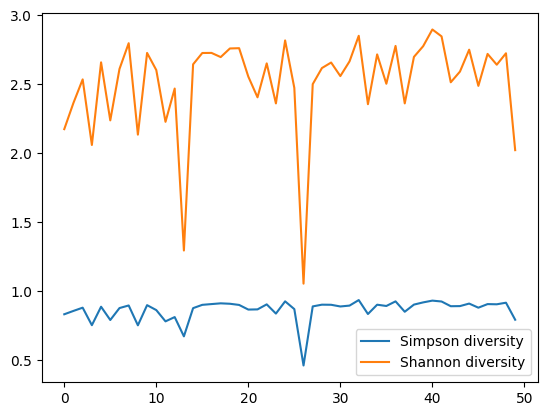

In [51]:
plt.plot(date_simpson_diversity, label = "Simpson diversity")
plt.plot(date_shannon_diversity, label = "Shannon diversity")
plt.legend()

In [50]:
# Plotting with date taken into account might take into account the drops in simpson/shannon diversity.
# It loosks like both of them are following very similar trends 

In [53]:
# Calculate mean simpson and shannon diversity
mean_simpson = simpson_and_shannon['Simpson Diversity'].mean()
mean_shannon = simpson_and_shannon['Shannon Diversity'].mean()
mean_simpson, mean_shannon

(0.8643072687169442, 2.513685345464552)

### Calculate alpha diversity for each survey period

In [59]:
alpha_diversity = pd.DataFrame()
alpha_diversity['Date'] = pc_dates
alpha_diversity['Alpha Diversity'] = [diversity_metrics.alpha_diversity(pc_species, date) for date in pc_dates]
alpha_diversity

/Users/meilinyen/Desktop/bfb-babs-2024/diversity_metrics.py:42: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date_species_groups = counts_from_date.groupby("Species").agg(sum)
/Users/meilinyen/Desktop/bfb-babs-2024/diversity_metrics.py:42: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date_species_groups = counts_from_date.groupby("Species").agg(sum)
/Users/meilinyen/Desktop/bfb-babs-2024/diversity_metrics.py:42: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior

,Date,Alpha Diversity
0,2023-10-06,1.203121
1,2023-10-12,1.168865
2,2023-10-14,1.137727
3,2023-10-20,1.329748
4,2023-10-22,1.128879
5,2023-10-25,1.266376
6,2023-10-28,1.141387
7,2023-10-31,1.117381
8,2023-11-01,1.331407
9,2023-11-05,1.114503


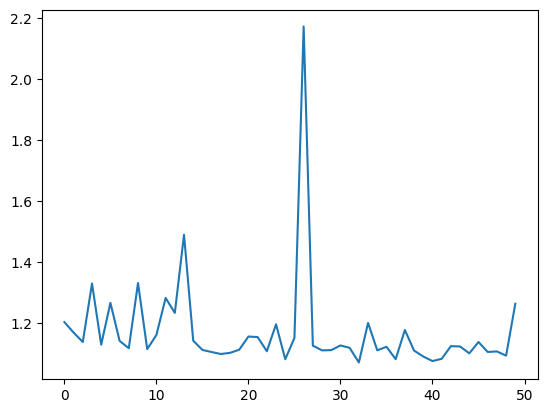

In [60]:
plt.plot(alpha_diversity['Alpha Diversity'], label = "Alpha diversity")

In [61]:
# Methinks I may have calculated something wrong last year...
# So I'll take another look